In [1]:
import numpy as np
from modules.algorithms import UtilityMatrix
from modules.agents import Population
from modules.simulator import Simulator
from modules.rewards import RewardFunctionExponential, RewardFunctionSquaredExponential
from modules.samplers import UniformSamplerRecommendation, GaussianSamplerRecommendation, MixtureGaussianSamplerRecommendation
from modules.samplers import UniformSamplerOpinion, GaussianSamplerOpinion, MixtureGaussianSamplerOpinion
from modules.parameters import ParametersUser, ParametersPopulation
from modules.utils import Opinion, ListOpinion

Basic parameters

In [2]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)
# recommendation_sampler = UniformSamplerRecommendation(low=-10.0, high=10.0)
recommendation_sampler = MixtureGaussianSamplerRecommendation(mean=[-1.0, 1.0], std=[0.1, 0.1])
opinion_sampler = UniformSamplerOpinion(low=-1.0, high=1.0)

Define parameters of the population

In [3]:
parameters = ParametersUser(prejudice=Opinion(0.0),
                            weight_prejudice=0.0,
                            weight_recommendation=0.4,
                            weight_current_opinion=0.6,
                            reward=reward)
parameters_population = ParametersPopulation(parameters=parameters,
                                             repeat=10000)

# Define population
population_1 = Population(initial_state=opinion_sampler.sample(number=parameters_population.n_agents()),
                          parameters=parameters_population,
                          save_history=True)

Augment population

In [4]:
parameters = ParametersUser(prejudice=Opinion(0.0),
                            weight_prejudice=0.0,
                            weight_recommendation=0.4,
                            weight_current_opinion=0.6,
                            reward=reward)
parameters_population = ParametersPopulation(parameters=parameters,
                                             repeat=10000)

# Define population
population_2 = Population(initial_state=opinion_sampler.sample(number=parameters_population.n_agents()),
                          parameters=parameters_population,
                          save_history=True)
# Sum populations
population = population_1 + population_2

Define algorithm

In [5]:
alg = UtilityMatrix(n_agents=population.n_agents(),
                    recommendation_sampler=recommendation_sampler,
                    exploration_probability=None,
                    exploration_frequency=50)

Run simulations and make plots

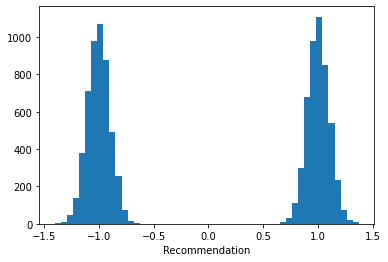

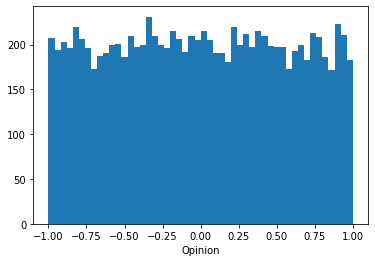

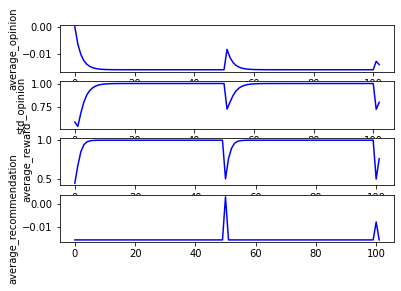

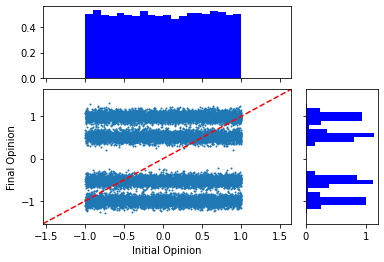

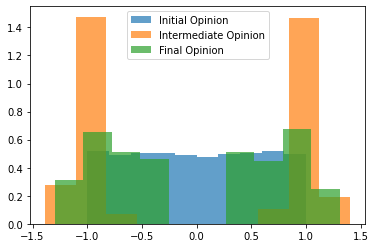

In [6]:
# Simulator
simulator = Simulator(agent=population,
                      algorithm=alg)

# Run
simulator.run(horizon=102)

# Plot
recommendation_sampler.plot()
opinion_sampler.plot()
simulator.agent.plot(save=False, name='sim_identical')